In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

In [9]:
from google.colab import files
uploaded = files.upload()

Saving calibration_test (1).png to calibration_test (1).png


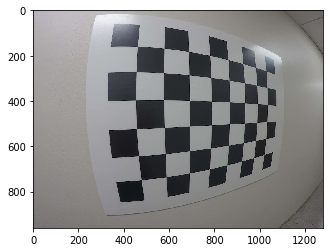

In [8]:
img = mpimg.imread('./calibration_test.png')
plt.imshow(img)

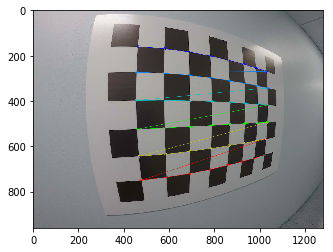

In [32]:
images = glob.glob('./calibration_test*.png')
# prepare object points
nx = 8
ny = 6
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

objp = np.zeros((6*8,3),np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2) # x,y coordinates


for fname in images:
  img = cv2.imread(fname)

  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Find the chessboard corners
  ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

  # If found, draw corners
  if ret == True:
      imgpoints.append(corners)
      objpoints.append(objp)
      # Draw and display the corners
      cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
      plt.imshow(img)


In [0]:
# Using objpoints and imgpoints, undistort
def cal_undistort(img, objpoints, imgpoints):
  ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, 
                                                   imgpoints, 
                                                   gray.shape[::-1], 
                                                   None, None)
  undist = cv2.undistort(img, mtx, dist, None, mtx)
  return undist



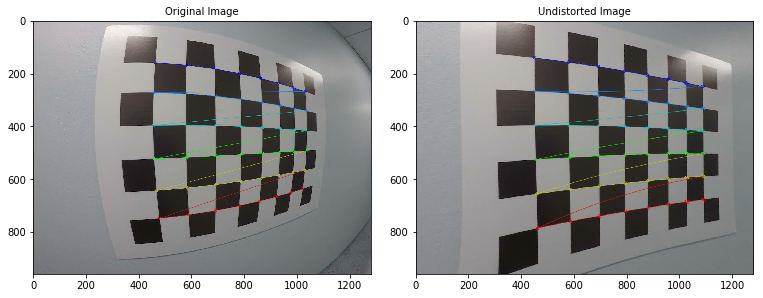

In [29]:
undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=10)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)